In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# load dataset 
df = pd.read_csv('open-banking-data.csv')
df.head()
df.tail()

,Name,Value.accountId,cluster_name_adjusted,Value.amount.currencyCode,mrch_catg_rlup_nm2,Value.dates.booked,amount,Category
1373,transactions,5a73582adf954cf6b3db6cc97bedccd9,Affluent Segment,GBP,VARIETY STORES,7/12/2023,56.05,shopping
1374,transactions,5a73582adf954cf6b3db6cc97tedggd9,Frugal Family,GBP,VARIETY STORES,6/13/2023,17.65,shopping
1375,transactions,5a73582adf954cf6b3db6cc97bedccd9,Affluent Segment,GBP,WOMENS READY TO WEAR STORES,6/1/2023,96.78,shopping
1376,transactions,5a73582adf954cf6b3db6cc97bedccd9,Affluent Segment,GBP,WOMENS READY TO WEAR STORES,6/3/2023,70.25,shopping
1377,transactions,5a73582adf954cf6b3db6cc97bedccd9,Affluent Segment,GBP,WOMENS READY TO WEAR STORES,7/13/2023,22.08,shopping


In [4]:
#Missing Values Calculation
df.isnull().sum()

Name                         0
Value.accountId              0
cluster_name_adjusted        0
Value.amount.currencyCode    0
mrch_catg_rlup_nm2           0
Value.dates.booked           0
amount                       0
Category                     6
dtype: int64

In [5]:
df['date'] = pd.to_datetime(df['Value.dates.booked'])
df = df.drop(['Value.dates.booked'], axis=1)
df.head()

,Name,Value.accountId,cluster_name_adjusted,Value.amount.currencyCode,mrch_catg_rlup_nm2,amount,Category,date
0,transactions,5a73582adf954cf6b3db6cc97bedccd9,Affluent Segment,GBP,AMUSEMENT PARKS/CIRCUS,3.73,entertainment,2023-05-12
1,transactions,5a73582adf954cf6b3db6cc97bedccd9,Affluent Segment,GBP,AMUSEMENT PARKS/CIRCUS,3.73,entertainment,2023-05-12
2,transactions,5a73582adf954cf6b3db6cc97bedccd9,Affluent Segment,GBP,AMUSEMENT PARKS/CIRCUS,4.39,entertainment,2023-06-02
3,transactions,5a73582adf954cf6b3db6cc97bedccd9,Affluent Segment,GBP,AMUSEMENT PARKS/CIRCUS,7.40,entertainment,2023-06-02
4,transactions,6r88582adf954cf6b3db6cc97bedccd9,Urban Spenders,GBP,ART DEALERS & GALLERIES,6.57,entertainment,2023-07-14


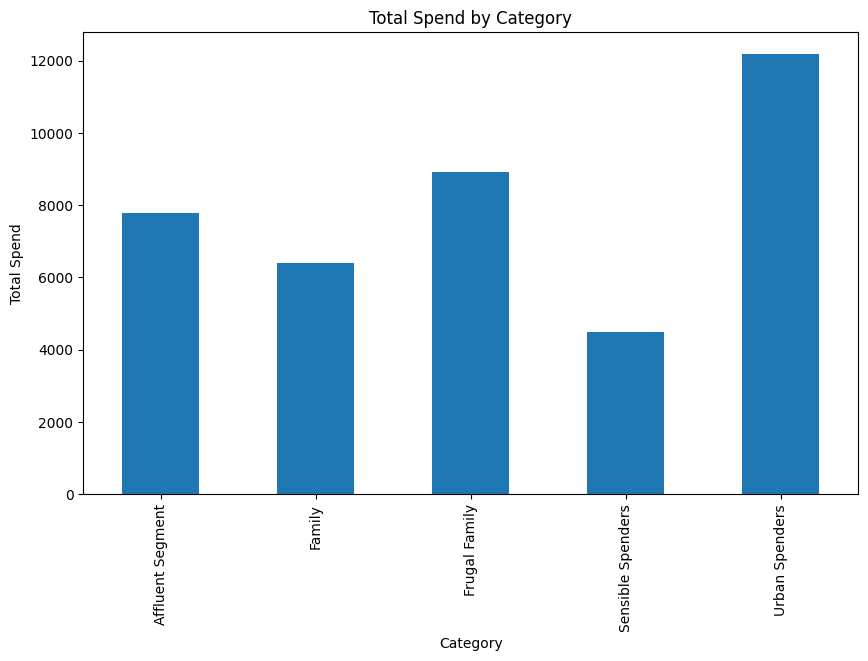

In [6]:
plt.figure(figsize=(10, 6))
df.groupby('cluster_name_adjusted')['amount'].sum().plot(kind='bar')
plt.title('Total Spend by Category')
plt.xlabel('Category')
plt.ylabel('Total Spend')
plt.show()


In [10]:
df['mm'] = df['date'].dt.month
df['yyyy'] = df['date'].dt.year
df['ym'] = df['yyyy'].astype(str) + '-' + df['mm'].astype(str)


df

,Name,Value.accountId,cluster_name_adjusted,Value.amount.currencyCode,mrch_catg_rlup_nm2,amount,Category,date,Month,mm,yyyy,ym
0,transactions,5a73582adf954cf6b3db6cc97bedccd9,Affluent Segment,GBP,AMUSEMENT PARKS/CIRCUS,3.73,entertainment,2023-05-12,5,5,2023,2023-5
1,transactions,5a73582adf954cf6b3db6cc97bedccd9,Affluent Segment,GBP,AMUSEMENT PARKS/CIRCUS,3.73,entertainment,2023-05-12,5,5,2023,2023-5
2,transactions,5a73582adf954cf6b3db6cc97bedccd9,Affluent Segment,GBP,AMUSEMENT PARKS/CIRCUS,4.39,entertainment,2023-06-02,6,6,2023,2023-6
3,transactions,5a73582adf954cf6b3db6cc97bedccd9,Affluent Segment,GBP,AMUSEMENT PARKS/CIRCUS,7.40,entertainment,2023-06-02,6,6,2023,2023-6
4,transactions,6r88582adf954cf6b3db6cc97bedccd9,Urban Spenders,GBP,ART DEALERS & GALLERIES,6.57,entertainment,2023-07-14,7,7,2023,2023-7
...,...,...,...,...,...,...,...,...,...,...,...,...
1373,transactions,5a73582adf954cf6b3db6cc97bedccd9,Affluent Segment,GBP,VARIETY STORES,56.05,shopping,2023-07-12,7,7,2023,2023-7
1374,transactions,5a73582adf954cf6b3db6cc97tedggd9,Frugal Family,GBP,VARIETY STORES,17.65,shopping,2023-06-13,6,6,2023,2023-6
1375,transactions,5a73582adf954cf6b3db6cc97bedccd9,Affluent Segment,GBP,WOMENS READY TO WEAR STORES,96.78,shopping,2023-06-01,6,6,2023,2023-6
1376,transactions,5a73582adf954cf6b3db6cc97bedccd9,Affluent Segment,GBP,WOMENS READY TO WEAR STORES,70.25,shopping,2023-06-03,6,6,2023,2023-6


In [12]:
df['Category'].unique()

array(['entertainment', 'transport', 'food', 'wellness', 'shopping', nan,
       'home', 'misc'], dtype=object)